# [Astropy](https://www.astropy.org/)
\
![Astropy](https://docs.astropy.org/en/stable/_static/astropy_banner.svg)
\
`astropy` zawiera mnóstwo funkcji i narzędzi do pracy z danymi astronomicznymi.

W dokumentacji można przeczytać, że pakiet ma funkcje dot.:
* struktura danych i transformacje, m.in: stałe, jednostki, czas i data, współrzędne
* obsługa plików (I/O): tabele ascii, pliki fits, votable
* obliczenia: kosmologia, konwolucje i filtrowanie sygnałów, wizualizacja danych, astrostatystyka

# Spis Treści

1. [Struktura danych](#data_structure)
    * [Stałe i jednostki](#const_and_units)
        - [Ćwiczenie nr 1](#ex1)
    * [Obsługa czasu](#timedate)
    * [Współrzędne](#cooridinates)
2. [Obsługa plików](#files)
    * [Otwieranie plików FITS](#fits)
    * [Wyświetlanie - normalizacja](#norm)
3. [Prosta i szybka fotometria aperturowa](#aperture)

# Importowanie i ustawienie notebook-a (uruchomić jako pierwsze!)

In [1]:
# import astropy as ap
import numpy as np

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=data_structure></a>
# 1. Struktura danych

<a id=const_and_units></a>
## Stałe i jednostki

In [5]:
import astropy.constants as const
import astropy.units as u

In [11]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [8]:
print(const.c)
print("-----------------------")
print(const.c.cgs)
print(type(const.c))
print(const.c.to("pc/s"))  # konwersja jednostek

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
-----------------------
29979245800.0 cm / s
<class 'astropy.constants.codata2018.CODATA2018'>
9.715611890180196e-09 pc / s


In [13]:
g = (const.G * const.M_earth) / (const.R_earth) ** 2
print(g)

9.798398133669465 m / s2


In [14]:
print(const.g0.value)

9.80665


In [15]:
(g*80*u.kg).to(u.N)

<Quantity 783.87185069 N>

In [17]:
# dir(const)

In [19]:
# (0.8 * u.arcsec).to(u.parsec)
print((0.5 * u.arcsec).to(u.parsec, equivalencies=u.parallax()))
print((6568 * u.Angstrom).to(u.GHz, equivalencies=u.spectral()))

2.0 pc
456444.0590742996 GHz


In [20]:
grosz = u.def_unit("grosz") # definiowanie własnych jednostek
pln = u.def_unit("pln", 100*grosz)
2.49*pln.to(grosz)

249.00000000000003

In [21]:
fortnight = u.def_unit('fortnight', 14 * u.day)
const.c.to("lyr/fortnight")

<Quantity 0.03832991 lyr / fortnight>

<a id="ex1"></a>
### Ćwiczenie nr 1

Policz prędkość Ziemi w km/s wokół Słońca (zakładając orbitę kołową). Skorzystaj z poniższego wzoru oraz z modułów `constants` i `units`:

$$v = \sqrt{\frac{G M_{\odot}}{r}}$$

<a id="timedate"></a>
## Obsługa czasu

In [22]:
from astropy.time import Time

In [23]:
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(times, format='isot', scale='utc')
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [24]:
t[1]

<Time object: scale='utc' format='isot' value=2010-01-01T00:00:00.000>

In [25]:
t = Time(times)
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [26]:
t.jd

array([2451179.50000143, 2455197.5       ])

In [27]:
t.mjd

array([51179.00000143, 55197.        ])

In [28]:
nt = Time.now() # current time
print(nt)
nt.sidereal_time('apparent', 'greenwich') 

2025-05-21 14:42:13.118043


<Longitude 6.66993532 hourangle>

In [29]:
nt = Time.now() # current time
t = Time(nt, scale='utc', location=('17d', '51.1d'))
print(t)
t.sidereal_time('apparent')

2025-05-21 14:43:43.230645


<Longitude 7.82836847 hourangle>

<a id="coordinates"></a>
## Współrzędne

In [32]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun#, get_moon

`astropy.coordinates.SkyCoord.from_name` używa Simbad-a do wyszkiwania obiektów po nazwie

Wyszukajmy współrzędne dla NGC6823:

In [33]:
obj_name = "NGC6823"
obj = SkyCoord.from_name(obj_name)

In [38]:
obj

<SkyCoord (ICRS): (ra, dec) in deg
    (295.794, 23.321)>

Użyjmy `astropy.coordinates.EarthLocation` żeby stworzyć obiekt `location` z danymi dot. miejsca obserwacji.
Weźmy obserwatorium w Białkowie:


In [43]:
bialkow = EarthLocation(lat=51.476111*u.deg, lon=16.656667*u.deg, height=130*u.m)
utcoffset = 2*u.hour  # Obecnie mamy czas zimowy
time = Time.now()
time

<Time object: scale='utc' format='datetime' value=2025-05-21 14:52:04.677603>

Skonwertujmy współrzędne do `AltAz`(ymutalnych) w miejscu obserwacji

In [42]:
obj_altaz = obj.transform_to(AltAz(obstime=time,location=bialkow))
print(obj_altaz.alt)

-15d07m06.08349476s


In [49]:
y, m, d, _, _, _ = time.ymdhms
midnight = Time(str(y)+'-'+str(m)+'-'+str(d)+'T00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
delta_midnight
night = AltAz(obstime=midnight+delta_midnight, location=bialkow)
obj_altaz = obj.transform_to(night)
# obj_altaz

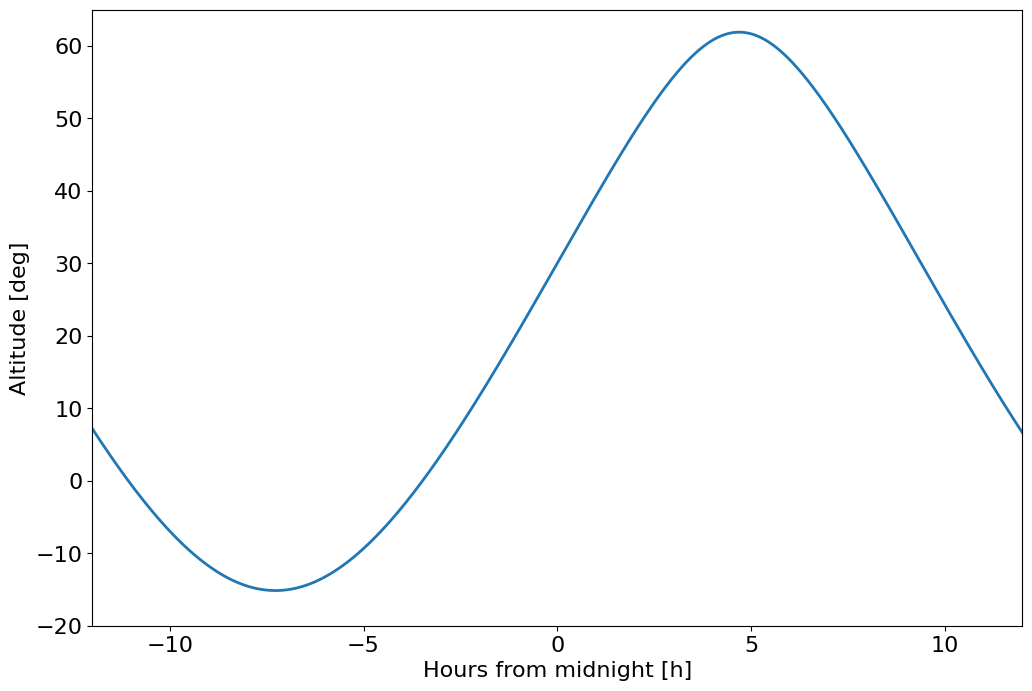

In [50]:
plt.plot(delta_midnight, obj_altaz.alt)
plt.xlim(-12, 12)
plt.ylim(-20, 65)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.show()

In [51]:
sun_altaz = get_sun(midnight+delta_midnight).transform_to(night)
# moon_altaz = get_moon(midnight+delta_midnight).transform_to(night)

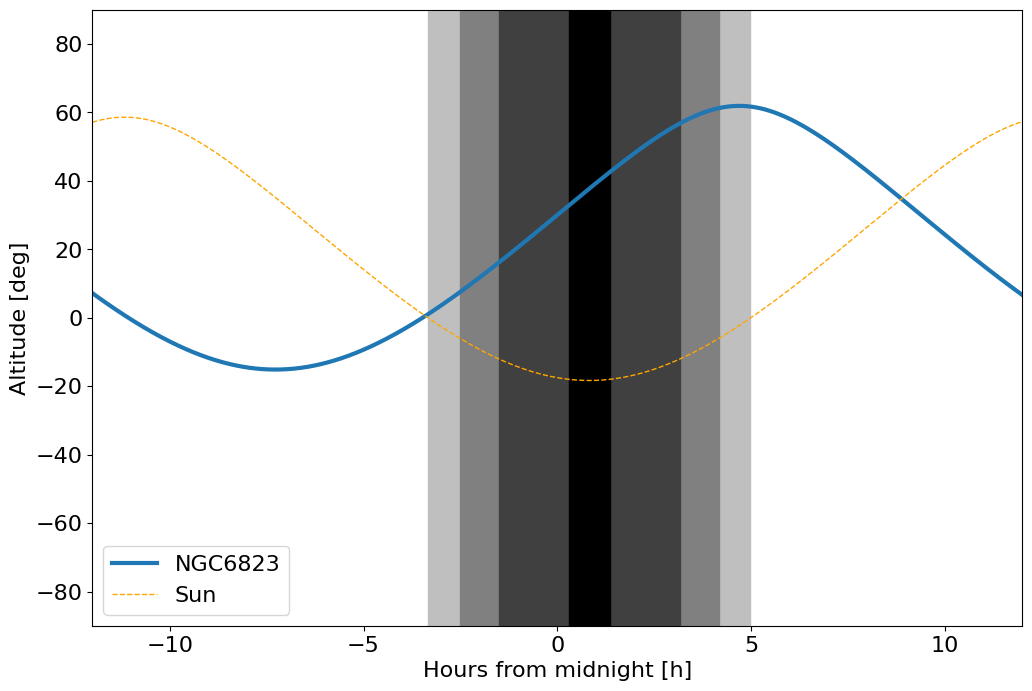

In [59]:
plt.plot(delta_midnight, obj_altaz.alt, lw=3, label=obj_name)
plt.plot(delta_midnight, sun_altaz.alt, color="orange", ls="--", lw=1, label="Sun")
# plt.plot(delta_midnight, moon_altaz.alt, color="gray", ls="--", lw=1, label="Moon")
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt.value < -0, color='0.75')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt.value < -6, color='0.5')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt.value < -12, color='0.25')
plt.fill_between(delta_midnight.value, -90, 90, sun_altaz.alt.value < -18, color='k')
plt.xlim(-12, 12)
plt.ylim(-90, 90)
plt.xlabel('Hours from midnight [h]')
plt.ylabel('Altitude [deg]')
plt.legend(loc='lower left')
plt.show()

# 2. Obsługa plików

<a id="fits"></a>
## Otwieranie plików FITS

In [60]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

In [65]:
# dirpath = os.path.join("..","data")
dirpath = os.path.join("")
inputfile = "NGC6823_UDF_I.fits"
data, header = fits.getdata(os.path.join(dirpath, inputfile), header=True)

In [80]:
fitsfile = fits.open(os.path.join(dirpath, inputfile))

In [67]:
print(fitsfile.info())

Filename: NGC6823_UDF_I.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      69   (1274, 1204)   float32   
None


In [72]:
# print(fitsfile[0].data)

In [81]:
print(fitsfile[0].header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 1274 / Axis length                                    NAXIS2  =                 1204 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2016-08-18T18:11:07' / Date FITS file was generated                  IRAF-TLM= '2016-08-18T18:11:07' / Time of last modification                     OBJECT  = 'NGC6823_udf'        / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.361100000000E+04 / Modified Julian date at start                  RADESYS = 'ICRS    '           / Astrome

In [75]:
fitsfile.close()

In [79]:
with fits.open(os.path.join(dirpath, inputfile), mode='update') as filehandle:
    filehandle[0].header.pop('MYHDRKW')
    # filehandle[0].header['MYHDRKW']='My Header Keyword'

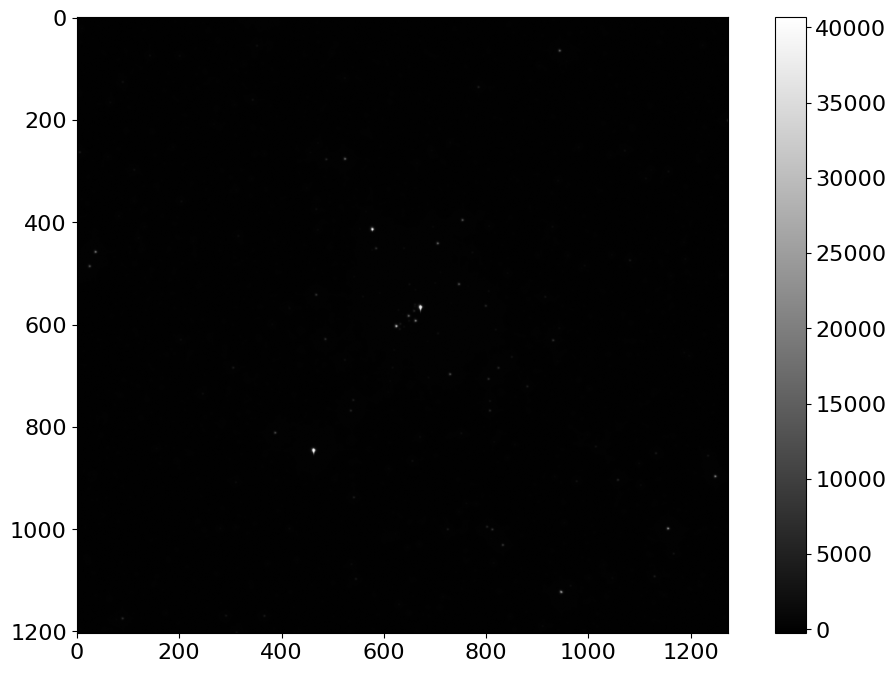

In [82]:
plt.imshow(fitsfile[0].data, cmap='gray')
plt.colorbar()

In [83]:
from matplotlib.colors import LogNorm

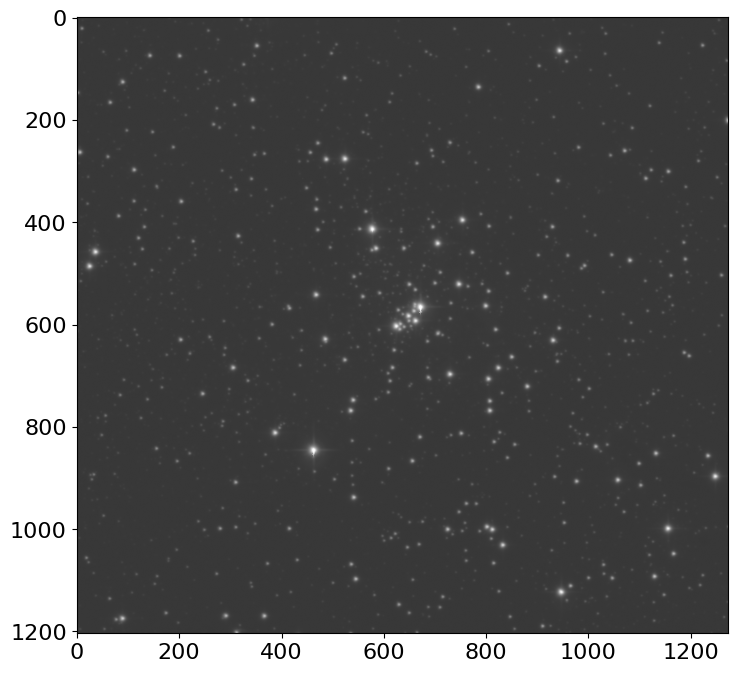

In [84]:
plt.imshow(fitsfile[0].data, cmap='gray', norm=LogNorm())

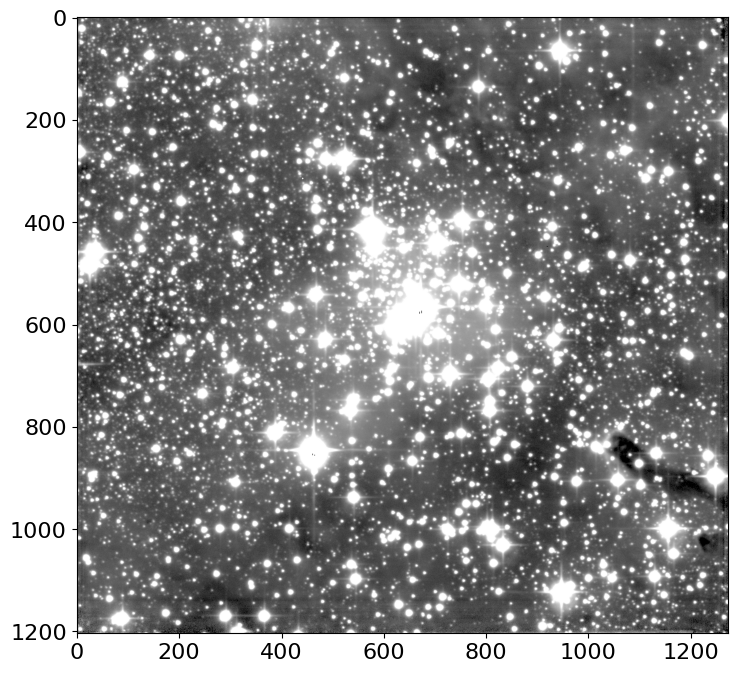

In [85]:
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, ZScaleInterval

norm = ImageNormalize(fitsfile[0].data, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(fitsfile[0].data, cmap='gray', norm=norm)

<a id="norm"></a>
## Wyświetlanie - normalizacja

In [86]:
image_list = [os.path.join(dirpath,"M13_blue_000"+str(n)+".fits") for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

FileNotFoundError: [Errno 2] No such file or directory: 'M13_blue_0001.fits'

In [87]:
image_concat

NameError: name 'image_concat' is not defined

In [ ]:
final_image = np.zeros(shape=image_concat[0].shape)

In [ ]:
for image in image_concat:
    final_image += image

In [ ]:
final_image

In [ ]:
from astropy.visualization.stretch import SinhStretch, LinearStretch

norm = ImageNormalize(image_concat[0], interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(image_concat[0], cmap='gray', norm=norm)

In [ ]:
norm = ImageNormalize(final_image, interval=ZScaleInterval(), stretch=SinhStretch())

plt.imshow(final_image, cmap='gray', norm=norm)

<a id="aperture"></a>
# Prosta i szybka fotometria aperturowa

In [88]:
!pip install photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.5/737.5 kB 2.5 MB/s eta 0:00:000m eta -:--:--


In [96]:
inputfile = "HST.fits"
hst = fits.open(os.path.join(dirpath, inputfile))
hst_image = hst[0].data[0]
hst_image -= np.median(hst_image)

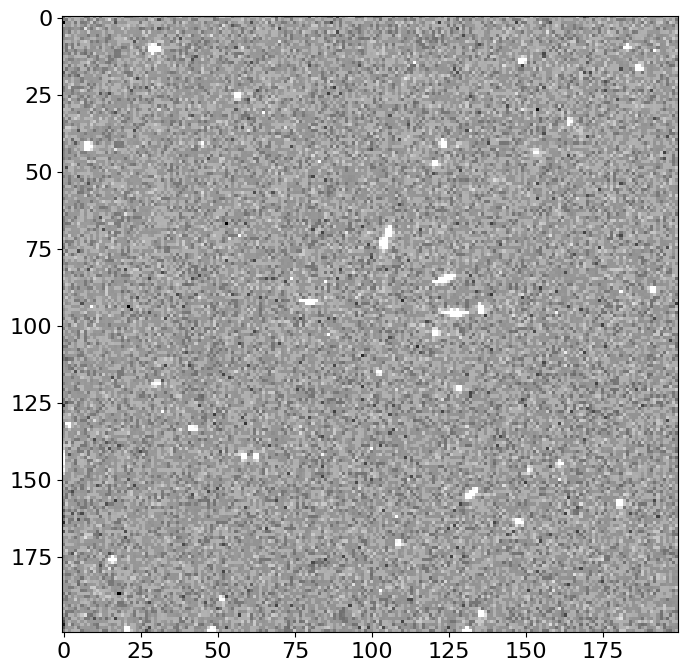

In [97]:
norm = ImageNormalize(hst_image, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(hst_image, cmap='gray', norm=norm)

In [98]:
# conda install -c conda-forge photutils
# pip install photutils

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(hst_image)  
daofind = DAOStarFinder(fwhm=1., threshold=3. * bkg_sigma)
sources = daofind(hst_image)
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

/Users/krzkot/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 id xcentroid ycentroid sharpness  ...    flux       mag     daofind_mag 
--- --------- --------- ---------- ... --------- ----------- ------------
  1  154.3921 2.6294776 0.96668361 ... 1.1991489 -0.19718277 -0.001816734
  2 28.055047 10.438071 0.92126989 ... 2609.1484  -8.5412474   -5.9821881
  3  182.9815 9.9287851 0.98126768 ... 120.31925  -5.2008381    -3.589204
  4 193.01468 11.198598 0.99118147 ... 8.3852186  -2.3087859  -0.29648969
  5 148.62036 14.186897 0.97040786 ... 414.09283  -6.5427442    -4.692442
  6 114.33588 14.856605 0.99220426 ...  17.45384  -3.1047275   -1.3845096
  7 186.84903 16.416154 0.97350811 ... 474.02527  -6.6895037   -4.7974776
  8 56.744032 26.137503  0.9680927 ... 227.87138  -5.8942246   -3.7175228
  9 64.926944  31.16492 0.99545478 ... 24.944283  -3.4924273   -1.6574389
 10 164.42523  34.03539 0.97208374 ... 136.00122  -5.3338571   -3.4205634
...       ...       ...        ... ...       ...         ...          ...
 40 107.74162 161.51264  0.9777252 ...

In [100]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=3.)  
phot_table = aperture_photometry(hst_image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
--- --------- --------- ------------
  1  154.3921 2.6294776    7.4624422
  2 28.055047 10.438071    2600.8284
  3  182.9815 9.9287851    120.97882
  4 193.01468 11.198598     10.58215
  5 148.62036 14.186897    413.30626
  6 114.33588 14.856605    19.318195
  7 186.84903 16.416154    474.51511
  8 56.744032 26.137503     225.8168
  9 64.926944  31.16492    25.515318
 10 164.42523  34.03539    136.10422
...       ...       ...          ...
 40 107.74162 161.51264     12.46787
 41 147.41102 163.83547    231.71563
 42 108.88996  170.9079    197.33485
 43 15.118192 175.96856     207.0704
 44 102.95346 186.13397    11.222112
 45 51.579362 188.99373    148.88755
 46 135.60664 194.71603    147.83923
 47 20.701911 198.07331    101.17398
 48  47.99196 198.29162    374.29916
 49 130.90872 198.93195    226.76214
Length = 49 rows


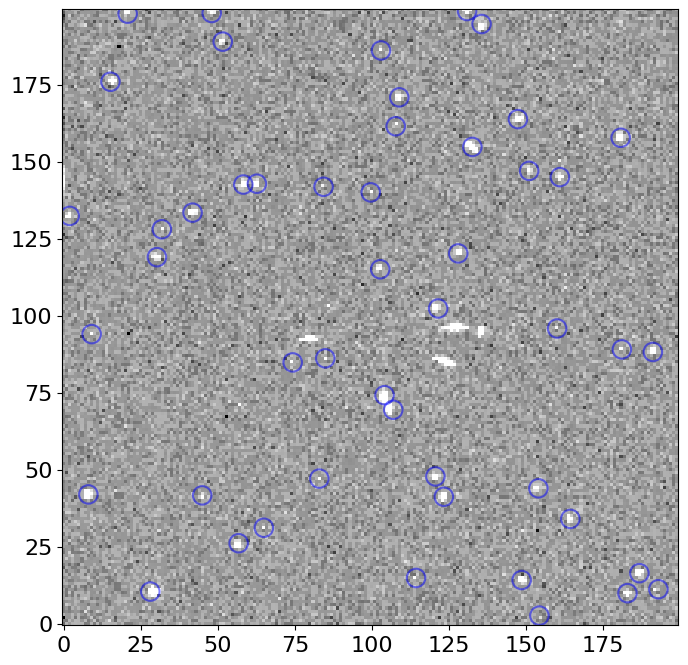

In [101]:
import matplotlib.pyplot as plt
plt.imshow(hst_image, cmap='gray', origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5);

# [Astroquery](https://astroquery.readthedocs.io/en/latest/)

In [102]:
!pip install --pre astroquery

# conda install -c conda-forge astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.8 MB/s eta 0:00:005.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 6.6 MB/s eta 0:00:00


### Simbad

In [106]:
from astroquery.simbad import Simbad

result_table = Simbad.query_object("NGC6823")
result_table.pprint()

 main_id     ra    dec   ... coo_wavelength     coo_bibcode     matched_id
            deg    deg   ...                                              
--------- ------- ------ ... -------------- ------------------- ----------
NGC  6823 295.794 23.321 ...              O 2021A&A...647A..19T  NGC  6823


In [107]:
result_table

main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,coo_wavelength,coo_bibcode,matched_id
,deg,deg,mas,mas,deg,,,
object,float64,float64,float32,float32,int16,str1,object,object
NGC 6823,295.794,23.321,--,--,--,O,2021A&A...647A..19T,NGC 6823


In [108]:
from astropy import coordinates
import astropy.units as u

c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')

r = 5 * u.arcminute

result_table = Simbad.query_region(c, radius=r)

result_table.pprint(show_unit=True, max_width=80, max_lines=5)

          main_id                  ra       ...     coo_bibcode    
                                  deg       ...                    
---------------------------- -------------- ... -------------------
ALMA J053514.4142-052220.792  83.8100591667 ... 2023MNRAS.522...56V
                         ...            ... ...                 ...
                    Brun 676 83.84276486886 ... 2020yCat.1350....0G
                 [H97b] 9009 83.79990004111 ... 2020yCat.1350....0G
Length = 3324 rows


In [109]:
result_table

main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,coo_wavelength,coo_bibcode
,deg,deg,mas,mas,deg,,
object,float64,float64,float32,float32,int16,str1,object
ALMA J053514.4142-052220.792,83.8100591667,-5.3724424722,--,--,--,M,2023MNRAS.522...56V
ALMA J053514.5715-052230.424,83.8107145833,-5.3751180278,--,--,--,M,2023MNRAS.522...56V
ALMA J053516.8979-052227.095,83.8204079167,-5.3741930556,--,--,--,M,2023MNRAS.522...56V
[SEM2016] 411,83.81570833333333,-5.389666666666666,--,--,--,R,2016ApJ...831..155S
[HC2000] 73,83.84604166666666,-5.416722222222223,--,--,--,R,2016ApJ...831..155S
PSH 130,83.81758333333333,-5.415555555555556,--,--,--,R,2016ApJ...831..155S
[HC2000] 776,83.83029166666665,-5.347194444444445,--,--,--,R,2016ApJ...831..155S
[EC2006] MM14,83.80804329166665,-5.402616583333334,--,--,--,R,2016ApJ...822...93F


In [110]:
result_table = Simbad.query_object("m [1-9]", wildcard=True)

print(result_table)

KeyboardInterrupt: 

### Vizier

In [118]:
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
from astroquery.vizier import Conf
Conf.row_limit = -1
Vizier.ROW_LIMIT = -1

result = Vizier.query_region("NGC6823", radius=Angle(0.1, "deg"), catalog='I/355/gaiadr3')
# result = Vizier.query_region("NGC6823", radius="0d6m0s", catalog='I/355/gaiadr3')
# result = Vizier.query_region("NGC6823", radius=0.1*u.deg, catalog='I/355/gaiadr3')
result

TableList with 1 tables:
	'0:I/355/gaiadr3' with 57 column(s) and 2617 row(s) 

In [119]:
result = Vizier(catalog="III/135A", columns=["HD","_RA.icrs","_DEC.icrs","Ptg"]).query_constraints(Ptg="5.0..6.0")
result[0]

_RA.icrs,_DEB1950,HD,Ptg,_RAB1950
,deg,,mag,deg
str10,float64,int32,float32,float64
00 05 19.2,-5.9883,28,5.68,0.6900
00 06 23.9,63.8951,144,5.44,0.9463
00 07 48.1,-22.7883,319,5.92,1.3131
00 10 02.2,10.8783,560,5.46,1.8666
00 10 18.0,45.7950,571,5.36,1.9231
00 11 18.0,-15.7384,693,5.47,2.1876
00 13 30.9,40.7615,905,5.87,2.7252
00 14 54.2,-9.8386,1064,5.74,3.0878
